In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# def filter_data_for_year(df, year):
#     selected_columns = ['Country Name', 'Indicator Name', str(year)]
#     filtered_df = df[selected_columns]
#     pivoted_df = filtered_df.pivot(index='Country Name', columns='Indicator Name', values=str(year))
#     return pivoted_df

In [7]:
def readFile(filename,cntry_list,indicator):
    df=pd.read_excel(filename,skiprows=2,header=1)
    ref_df=df[(df['Country Name'].isin(cntry_list)) & (df['Indicator Name']==indicator)]
    ref_df=ref_df.drop(df.columns[1:4],axis=1)
    yr=[str(year) for year in range(1960,2011)] + [str(year) for year in range(2021,2023)]
    final_df=ref_df.drop(columns=yr)
    final_df=final_df.reset_index(drop=True)
    trans_df=final_df.transpose()
    trans_df.columns=trans_df.iloc[0]
    trans_df=trans_df[1:]
    trans_df.index.names=['Years']
    return final_df,trans_df

In [8]:
cntry_list=['Brazil','Russian Federation','India','China','United Kingdom']

In [9]:
foss_df,foss_trans=readFile("foss_fl_en_cons.xls",cntry_list,'Fossil fuel energy consumption (% of total)')
foss_df

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,54.568709,56.548892,58.018082,59.107533,NaN,NaN,NaN,NaN,NaN,NaN
1,China,88.898363,88.419162,88.237493,87.670431,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,85.563186,85.139812,83.559741,82.716578,80.351771,NaN,NaN,NaN,NaN,NaN
3,India,71.471719,72.419079,72.285459,73.576979,NaN,NaN,NaN,NaN,NaN,NaN
4,Russian Federation,90.908316,90.865809,89.511802,92.142876,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
unempl_df,unempl_trans=readFile("unemploy.xls",cntry_list,'Unemployment, total (% of total labor force) (modeled ILO estimate)')
unempl_df

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,7.580,7.250,7.070,6.760,8.560,11.740,12.930,12.46,12.05,13.930
1,China,4.550,4.580,4.600,4.630,4.650,4.560,4.470,4.31,4.56,5.000
2,United Kingdom,8.040,7.880,7.520,6.110,5.300,4.810,4.330,4.00,3.74,4.472
3,India,8.168,8.095,8.037,7.981,7.915,7.842,7.733,7.65,6.51,10.195
4,Russian Federation,6.540,5.440,5.460,5.160,5.570,5.560,5.210,4.85,4.50,5.590


In [11]:
lit_df,lit_trans=readFile("literacy.xls",cntry_list,'Literacy rate, adult total (% of people ages 15 and above)')
lit_df

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,91.411240,91.337852,91.484238,91.729431,92.047897,92.808441,93.075821,93.227501,NaN,NaN
1,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.150002
2,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,69.302559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
hygiene_df,hygiene_trans=readFile("mort_unsafe_hygiene.xls",cntry_list,'Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)')
hygiene_df

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,NaN
1,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2,NaN
2,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1,NaN
3,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4,NaN
4,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,NaN


In [13]:
export_df,export_trans=readFile("export_goods.xls",cntry_list,'Exports of goods and services (% of GDP)')
export_df

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,11.582513,11.877539,11.742231,11.011943,12.900191,12.466679,12.518968,14.634999,14.122919,16.453552
1,China,26.568189,25.492522,24.599254,23.510061,21.354080,19.584380,19.692277,19.112104,18.409992,18.586139
2,United Kingdom,31.092632,30.374536,30.049217,28.389969,27.630325,28.650471,30.672448,31.234907,31.257606,29.237190
3,India,24.540411,24.534431,25.430861,22.967963,19.813189,19.158235,18.791765,19.927829,18.664265,18.705247
4,Russian Federation,28.055361,26.907320,25.845337,27.111097,28.703389,25.854483,26.090881,30.793257,28.433431,25.522186


In [14]:
airp_df,airp_trans=readFile("mort_air_poll.xls",cntry_list,'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)')
airp_df

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.9,NaN
1,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.3,NaN
2,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,NaN
3,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.3,NaN
4,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.1,NaN


In [15]:
labour_df,labour_trans=readFile("lab_force.xls",cntry_list,'Labor force, total')
labour_df

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,94948394.0,97188186.0,98532617.0,99628945.0,101299233.0,102278733.0,104079618.0,105437485.0,107415119.0,100641930.0
1,China,778323480.0,778937997.0,779042510.0,780062420.0,780709584.0,780524312.0,778674707.0,776278514.0,775321104.0,751446327.0
2,United Kingdom,32478068.0,32778349.0,33061439.0,33331376.0,33614102.0,33939706.0,34128763.0,34415434.0,34695933.0,34633314.0
3,India,472419461.0,476025371.0,476574166.0,476778623.0,476681505.0,476439285.0,475894660.0,474730667.0,501044031.0,496925540.0
4,Russian Federation,76076120.0,75911657.0,75613136.0,75425759.0,75122849.0,75182854.0,74610600.0,74501321.0,73598523.0,73064922.0


In [16]:
renew_df,renew_trans=readFile("rnew_enrgy_cons.xls",cntry_list,'Renewable energy consumption (% of total final energy consumption)')
renew_df

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,45.26,43.49,42.32,41.71,43.62,45.46,45.33,46.95,47.58,50.05
1,China,11.34,11.53,11.47,11.91,12.18,12.60,13.14,13.55,14.33,14.81
2,United Kingdom,3.94,4.15,5.18,6.53,7.71,7.68,8.81,10.09,11.39,13.50
3,India,35.01,34.75,34.86,33.85,33.40,33.01,32.57,32.73,33.27,35.82
4,Russian Federation,3.23,3.24,3.61,3.30,3.20,3.36,3.25,3.18,3.22,3.72


In [17]:
gdp_df,gdp_trans=readFile("gdp.xls",cntry_list,'GDP per capita (current US$)')
gdp_df

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,13200.558166,12327.515556,12258.564849,12071.404655,8783.214413,8680.735421,9896.717511,9121.020092,8845.323931,6923.700197
1,China,5614.385739,6300.582352,7020.385682,7636.074223,8016.446016,8094.390375,8817.045496,9905.406118,10143.860206,10408.719125
2,United Kingdom,42150.698141,42485.586070,43449.091717,47447.588932,45071.074323,41146.077356,40622.689388,43306.308305,42747.080460,40318.416923
3,India,1449.603301,1434.017978,1438.056995,1559.863772,1590.174322,1714.279541,1957.969814,1974.377730,2050.163790,1913.219721
4,Russian Federation,14311.064453,15420.858398,15974.623047,14095.646484,9313.021484,8704.894531,10720.332031,11287.354492,11536.258789,10194.441406


In [18]:
pop_df,pop_trans=readFile("pop_total.xls",cntry_list,'Population, total')
pop_df


,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,1.981853e+08,1.999777e+08,2.017218e+08,2.034596e+08,2.051882e+08,2.068596e+08,2.085050e+08,2.101666e+08,2.117829e+08,2.131963e+08
1,China,1.345035e+09,1.354190e+09,1.363240e+09,1.371860e+09,1.379860e+09,1.387790e+09,1.396215e+09,1.402760e+09,1.407745e+09,1.411100e+09
2,United Kingdom,6.325881e+07,6.370022e+07,6.412827e+07,6.460230e+07,6.511622e+07,6.561159e+07,6.605886e+07,6.646034e+07,6.683633e+07,6.708123e+07
3,India,1.257621e+09,1.274487e+09,1.291132e+09,1.307247e+09,1.322867e+09,1.338636e+09,1.354196e+09,1.369003e+09,1.383112e+09,1.396387e+09
4,Russian Federation,1.429609e+08,1.432017e+08,1.435070e+08,1.438197e+08,1.440969e+08,1.443424e+08,1.444967e+08,1.444779e+08,1.444063e+08,1.440731e+08


In [36]:
gdp_df.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,15345.261960,15593.712071,16028.144458,16562.115613,14554.786112,13668.075445,14402.950848,15118.893347,15064.537435,13951.699474
std,15905.816619,15974.432713,16279.828884,17922.780143,17341.150716,15640.544397,15061.726336,16164.345606,15898.408261,15134.325683
min,1449.603301,1434.017978,1438.056995,1559.863772,1590.174322,1714.279541,1957.969814,1974.377730,2050.163790,1913.219721
25%,5614.385739,6300.582352,7020.385682,7636.074223,8016.446016,8094.390375,8817.045496,9121.020092,8845.323931,6923.700197
50%,13200.558166,12327.515556,12258.564849,12071.404655,8783.214413,8680.735421,9896.717511,9905.406118,10143.860206,10194.441406
75%,14311.064453,15420.858398,15974.623047,14095.646484,9313.021484,8704.894531,10720.332031,11287.354492,11536.258789,10408.719125
max,42150.698141,42485.586070,43449.091717,47447.588932,45071.074323,41146.077356,40622.689388,43306.308305,42747.080460,40318.416923


In [ ]:
CO2_df,CO2_trans=readFile("CO2_kt.xls",cntry_list,'')

In [4]:
df = pd.read_excel(r"C:\Users\sandr\Documents\ADS1-2\API_6_DS2_en_excel_v2_6010484.xls",skiprows=2,header=1)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Mortality rate attributed to unsafe water, uns...",SH.STA.WASH.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,People using safely managed sanitation service...,SH.STA.SMSS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,People using safely managed sanitation service...,SH.STA.SMSS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,People using safely managed sanitation service...,SH.STA.SMSS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,Mortality rate attributed to unintentional poi...,SH.STA.POIS.P5.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
cntry_list=['Brazil','Russian Federation','India','China','United Kingdom']

In [5]:
ind_list=['Access to electricity (% of population)','CO2 emissions (kt)',
          'Forest area (% of land area)','Arable land (% of land area)','Agricultural land (% of land area)']

In [12]:
yr=[str(year) for year in range(1960,2011)] + [str(year) for year in range(2021,2023)]
#yr

In [13]:
cntry_df=df[df['Country Name'].isin(cntry_list)]
ind_df=cntry_df[cntry_df['Indicator Name'].isin(ind_list)]

data=cntry_df.drop(columns=yr)
#data


In [64]:
dfs=[]
for ind in ind_list:
    df_name = data.loc[df['Indicator Name'] == ind]
    dfs.append(df_name)  


In [65]:
new_df_names = [ind.split(' ')[0] + '_df' for ind in ind_list]
new_df_list = []
df_dict={'Access to electricity (% of population)':dfs[0],'CO2 emissions (kt)':dfs[1],
          'Forest area (% of land area)':dfs[2],'Arable land (% of land area)':dfs[3],'Agricultural land (% of land area)':dfs[4]}
for ind, new_df_name in zip(ind_list, new_df_names):
    if ind in df_dict:
        globals()[new_df_name] = df_dict[ind]
        new_df_list.append(globals()[new_df_name])

In [78]:
#Access_df

In [67]:
df1 = df_dict["Access to electricity (% of population)"].drop(['Country Code', 'Indicator Name','Indicator Code'], axis=1)

In [68]:
df1=df1.reset_index(drop=True)

In [69]:
df1=df1.transpose()

In [70]:
df1.columns=df1.iloc[0]
df1=df1[1:]
df1.index.names=['Years']

In [79]:
df1

Country Name,Brazil,China,United Kingdom,India,Russian Federation
Years,,,,,
2011,99.328691,99.887207,100.0,79.516785,99.20948
2012,99.519494,99.947433,100.0,79.9,100.0
2013,99.575151,99.99295,100.0,83.131393,100.0
2014,99.650247,100.0,100.0,85.133911,100.0
2015,99.710902,100.0,100.0,88.0,95.5
2016,99.7,100.0,100.0,89.586304,99.410225
2017,99.8,100.0,100.0,91.794159,100.0
2018,99.7,100.0,100.0,95.7,100.0
2019,99.8,100.0,100.0,95.885941,99.777969


In [71]:
df1.describe()

Country Name,Brazil,China,United Kingdom,India,Russian Federation
count,10.0,10.0,10.0,10.000000,10.0
unique,8.0,4.0,1.0,10.000000,6.0
top,99.7,100.0,100.0,79.516785,100.0
freq,2.0,7.0,10.0,1.000000,5.0


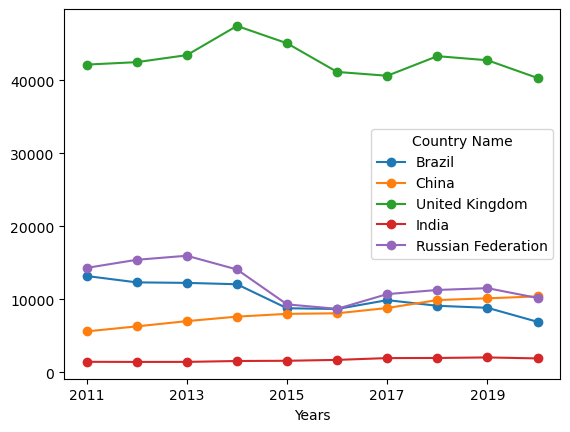

In [26]:
gdp_trans.plot(kind='line',marker='o')
plt.show()

===============================================

In [7]:
def filter_data_for_year(df, year):
    selected_columns = ['Country Name', 'Indicator Name', str(year)]
    filtered_df = df[selected_columns]
    pivoted_df = filtered_df.pivot(index='Country Name', columns='Indicator Name', values=str(year))
    return pivoted_df

In [14]:
filtered_data = filter_data_for_year(ind_df, 2020)
filtered_data

Indicator Name,Access to electricity (% of population),Agricultural land (% of land area),Arable land (% of land area),CO2 emissions (kt),Forest area (% of land area)
Country Name,,,,,
Brazil,99.702713,28.564619,6.895108,414138.8,59.417478
China,100.000000,55.462649,11.606259,10944686.2,23.431323
India,96.500000,60.045863,51.946881,2200836.3,24.270228
Russian Federation,99.897781,13.158436,7.428098,1618271.0,49.784336
United Kingdom,100.000000,71.340049,24.711703,308650.3,13.185632


In [99]:
filtered_data.describe()

Indicator Name,Access to electricity (% of population),Agricultural land (% of land area),Arable land (% of land area),CO2 emissions (kt),Forest area (% of land area)
count,5.000000,5.000000,5.000000,5.000000e+00,5.000000
mean,99.220099,45.714323,20.517610,3.097317e+06,34.017800
std,1.525418,24.036945,18.984925,4.459500e+06,19.588231
min,96.500000,13.158436,6.895108,3.086503e+05,13.185632
25%,99.702713,28.564619,7.428098,4.141388e+05,23.431323
50%,99.897781,55.462649,11.606259,1.618271e+06,24.270228
75%,100.000000,60.045863,24.711703,2.200836e+06,49.784336
max,100.000000,71.340049,51.946881,1.094469e+07,59.417478


In [100]:
filtered_data.corr()

Indicator Name,Access to electricity (% of population),Agricultural land (% of land area),Arable land (% of land area),CO2 emissions (kt),Forest area (% of land area)
Indicator Name,,,,,
Access to electricity (% of population),1.000000,-0.284553,-0.903098,0.150183,0.208782
Agricultural land (% of land area),-0.284553,1.000000,0.619494,0.201405,-0.916247
Arable land (% of land area),-0.903098,0.619494,1.000000,-0.159133,-0.572612
CO2 emissions (kt),0.150183,0.201405,-0.159133,1.000000,-0.308272
Forest area (% of land area),0.208782,-0.916247,-0.572612,-0.308272,1.000000


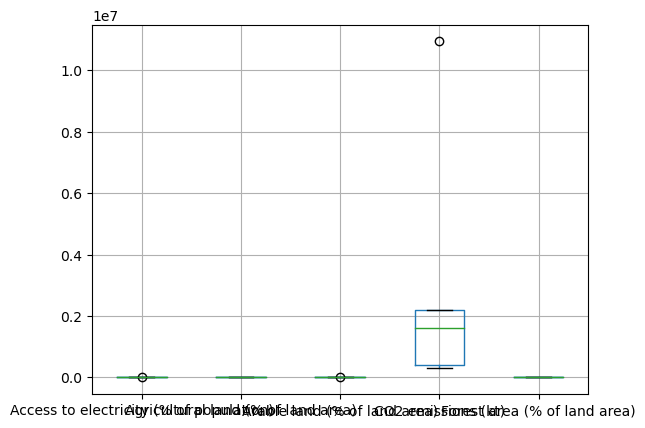

In [103]:
filtered_data.boxplot(column=['Access to electricity (% of population)', 'Agricultural land (% of land area)', 'Arable land (% of land area)', 'CO2 emissions (kt)', 'Forest area (% of land area)'])

plt.show()

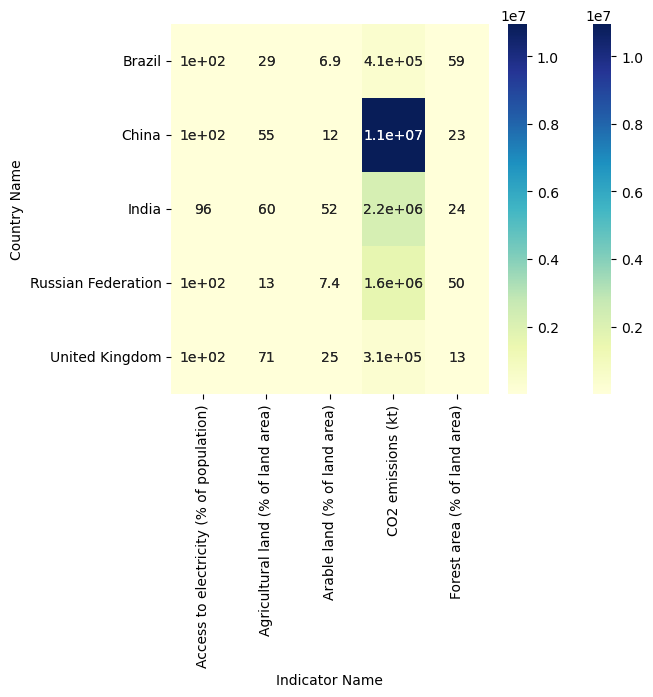

In [105]:
sns.heatmap(filtered_data, annot=True, cmap='YlGnBu')
plt.show()

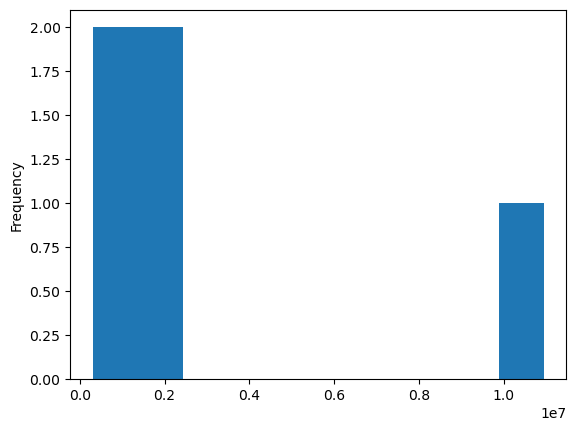

In [107]:
filtered_data['CO2 emissions (kt)'].plot(kind='hist',bins=10)
plt.show()

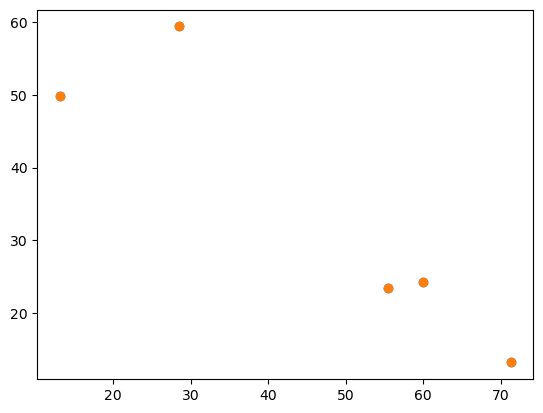

In [109]:
plt.scatter(filtered_data['Agricultural land (% of land area)'], filtered_data['Forest area (% of land area)'])
plt.show()

In [96]:
# s_yr=2020
# mask=cntry_df[str(s_yr)].notna()
# df_syr=cntry_df[mask]
# df_syr=df_syr.reset_index(drop=True)
# df_syr.head()
# #df_syr = df_syr.set_axis(df_syr['Indicator Name'], axis='columns')

In [72]:
# for i in range(0,len(ind_list)+1):
#     #print(i)
#     for j in ind_list:
#         print(i,j)
#         dfs[i]=j.split(' ')[0]
#         print(dfs[i])
#         print('-------------')

In [73]:
#df=pd.read_excel(r"C:\Users\sandr\Documents\ADS1-2\API_6_DS2_en_excel_v2_6010484.xls")
#df=df.reset_index(drop=True)
#df=df.transpose()
#df = df.rename(columns=df.iloc[0])
#df = df.drop(df.iloc[0,1],axis='columns')
#df=df.reset_index(drop=True)
#df

In [74]:
#df['Indicator Name'].to_list()[:141]

In [75]:
#df.head()

In [76]:
#df.loc[df['Country Name'] == 'India']

In [77]:
#df.loc[df['Indicator Name']=='Agricultural land (% of land area)']